<a href="https://colab.research.google.com/github/lhb00/basic_pytorch_for_deeplearning/blob/main/basic_pytorch_for_deeplearning_theme_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np

x=torch.empty(5,4)
print(x)

tensor([[ 4.1583e-35,  0.0000e+00, -7.2138e-03, -2.3489e+36],
        [ 0.0000e+00,  0.0000e+00, -3.6540e+14,  4.5757e-41],
        [ 7.5686e-09, -3.5027e+36, -3.4898e+14,  4.5757e-41],
        [ 0.0000e+00,  0.0000e+00, -2.1573e+08, -2.4410e+26],
        [-3.6511e+14,  4.5757e-41, -3.6511e+14,  4.5757e-41]])


In [2]:
torch.ones(3,3) #1로만 구성된 3X3 행렬

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [3]:
torch.zeros(2) #2행 0 벡터

tensor([0., 0.])

In [4]:
torch.rand(5,6)#랜덤한 숫자로 구성된 5X6 행렬

tensor([[0.9517, 0.6817, 0.5679, 0.3508, 0.8478, 0.8834],
        [0.1508, 0.3375, 0.6905, 0.7544, 0.7229, 0.9877],
        [0.2891, 0.0094, 0.6496, 0.3954, 0.7154, 0.1068],
        [0.5227, 0.9803, 0.0709, 0.1880, 0.8404, 0.7658],
        [0.2718, 0.3599, 0.9740, 0.7177, 0.0875, 0.2145]])

In [6]:
l = [13,4]
r = np.array([4,56,7])
torch.tensor(l) #텐서로 변환
torch.tensor(r)

tensor([ 4, 56,  7])

In [8]:
x.size()[1] #x.size는 5X4 크기의 텐서임.

4

In [9]:
type(x)

torch.Tensor

In [10]:
x = torch.rand(2,2)
y = torch.rand(2,2)
x+y

tensor([[1.1516, 0.1880],
        [1.7004, 1.0525]])

In [12]:
torch.add(x,y) #x+y와 동일

tensor([[1.1516, 0.1880],
        [1.7004, 1.0525]])

In [13]:
y.add(x) #y에 x를 더한다. 어차피 교환법칙 때문에 똑같.

tensor([[1.1516, 0.1880],
        [1.7004, 1.0525]])

In [14]:
x = torch.rand(8,8)
print(x.size())

torch.Size([8, 8])


In [15]:
a = x.view(64) #8X8에서 64로
print(a.size())

torch.Size([64])


In [16]:
b = x.view(-1,4,4) #-1을 사용하면 원래 크기가 되게 할 수 있다.
print(b.size())

torch.Size([4, 4, 4])


In [17]:
x = torch.rand(8,8)
y = x.numpy() #반대로 토치에서 넘파이로
type(y)

numpy.ndarray

In [19]:
x = torch.ones(1)
print(x.item())

1.0


In [20]:
#역전파
#(1)gradient tensor
#미분과 연쇄 법칙을 통해 원하는 변수에 대한 미분값 계산가능
import torch
x = torch.ones(2,2,requires_grad=True) #requires_grad=True는 gradient를 계산가능하게 해줌.
y = x+1
z = 2*y**2
r = z.mean()
print("Result:",r)

Result: tensor(8., grad_fn=<MeanBackward0>)


In [21]:
r.backward()
print(x.grad)

tensor([[2., 2.],
        [2., 2.]])


In [31]:
#autograd
#자동미분
import torch
from matplotlib import pyplot as plt
x = torch.FloatTensor(range(5)).unsqueeze(1) #range(5) 까지만 봤을 때는 크기가 5인 1차원 배열, unsqueeze(1)을 이용하여 1차원 확장하여 2차원 배열로 만듦, unsqueeze(0)이면 (1,5) 배열
y = 2*x + torch.rand(5,1)
num_features = x.shape[1]
w = torch.randn(num_features,1,requires_grad=True)
b = torch.randn(1, requires_grad=True)
#데이터는 불변해야하지만, w, b는 역전파를 통해 최적값을 찾는 것이므로 requires_grad=True 옵션 추가해주어야함.

In [32]:
#경사하강법
#가중치를 업데이트하는 최적화 방법 중 가장 널리 쓰이는 방법
learning_rate = 1e-3
optimizer = torch.optim.SGD([w,b], lr=learning_rate) #w,b를 리스트로 묶어 넣어주고 적절한 학습률을 정하여 가중치/편향 업데이트
loss_stack=[] #에포크 각각의 손실 값 저장을 위해 empty list 생성
for epoch in range(1001): #학습은 1000회 반복

  optimizer.zero_grad() # 누적 값을 optimizer.zero_grad()로 초기화
  y_hat=torch.matmul(x,w) + b # 회귀식 모델을 이용한 예측값 산출
  loss = torch.mean((y_hat-y)**2) # 예측값, 실제값으로 MSE(mean square error) 계산
  loss.backward() # 역전파의 기준을 손실 함수로 정하기
  optimizer.step() # optimizer로 최적화 실행
  loss_stack.append(loss.item()) # 손실 함수 값만 loss_stack에 하나씩 넣기. 손실 함수를 그리기 위함이므로 꼭 손실 함수 값만 넣기. item()을 사용하지 않으면 텐서 전체가 저장됨. 

  if epoch % 100 == 0:
    print(f'Epoch {epoch}:{loss.item()}') # 에포크가 100의 배수 일 때마다 손실 함수 값 출력

Epoch 0:7.573495388031006
Epoch 100:0.9421240091323853
Epoch 200:0.44948697090148926
Epoch 300:0.3751448094844818
Epoch 400:0.3335861265659332
Epoch 500:0.29834818840026855
Epoch 600:0.2671864330768585
Epoch 700:0.23954005539417267
Epoch 800:0.21500590443611145
Epoch 900:0.19323314726352692
Epoch 1000:0.1739112138748169


In [33]:
with torch.no_grad():
  y_hat = torch.matmul(x,w) + b #최종 학습된 w, b로 예측값 산출, 최적화 사용은 없으므로 requires_grad는 사용하지 않음. with torch.no_grad()로 requires_grad가 작동하지 않게 할 수 있음.

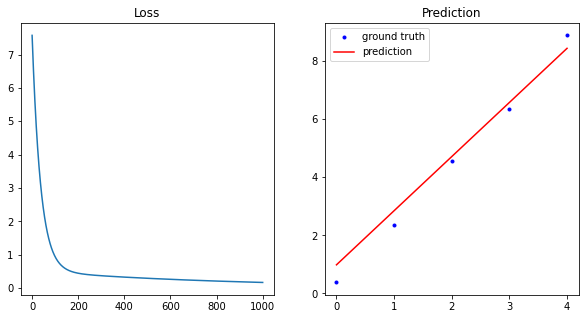

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")
plt.subplot(122)
plt.plot(x,y,'.b')
plt.plot(x,y_hat,'r-')
plt.legend(['ground truth','prediction'])
plt.title("Prediction")
plt.show()